# Project 1: Predict Diamonds Price

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3, style='dark')

# Step 1: Understand The domain of the project:
# ------------------------------------------------------------------
**Answering the questions of how to make a baseline for the project**

P1. The objective of this project is to predict the diamonds price

P2. This is a superised learning project (Features: carat, cut, color, clarity, depth, table, x, y, z - Class: price)

P3. This is a regression problem since the Price attribute is Continuous Numerical value

P4. This is a model-based Online Learning: No need to create batch feed model (data is not very large, is not continuously updated)

**Define The performance metrics:**

P5. The performence measure used would be : MSE or RMSE depending on the existance of outliers

P6. The minimum performance needed for this model is according to the mean(price attribute)= 3932.799722

# Step 2: Understand Your dataset:
# -------------------------------------------------

In [3]:
df = pd.read_csv('diamonds.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1) Content of dataset:
## ===================
- **price:** price in US dollars (\$326--\$18,823)
- **carat:** weight of the diamond (0.2--5.01)
- **cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color:** diamond colour, from J (worst) to D (best)
- **clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x:** length in mm (0--10.74)
- **y:** width in mm (0--58.9)
- **z:** depth in mm (0--31.8)
- **depth:** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- **table:** width of top of diamond relative to widest point (43--95)

## 2) Understand the data Structure:
# ========================

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


**From this info we understand that:**
- overall data points = 53940 row
- we have 7 numerical values (1 int: Price - 6 float) and 3 categorical attributes
- Data is complete in all attributes (NO NANs or Unknown Values)
- No need for the step of Data Cleaning

## (for categorical data):

In [5]:
cat_attributes= ['cut','color','clarity']
for att in cat_attributes:
    print(f'{att}:\n--------')
    res = df[att].value_counts()
    print(res)
    print('***********************************')


cut:
--------
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
***********************************
color:
--------
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
***********************************
clarity:
--------
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
***********************************


Text(0.5, 1.0, 'clarity')

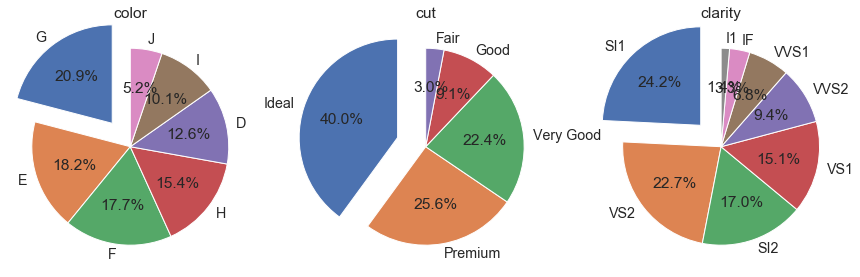

In [8]:
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3, style='dark')

plt.subplot(1,3,1)
myExplode = [0.3, 0, 0, 0, 0,0,0]
sns.set(rc={'figure.figsize': [5, 5]}, font_scale=1.3, style='dark')
plt.pie(list(df['color'].value_counts().values), labels=list(df['color'].value_counts().index) , explode= myExplode, autopct='%1.1f%%',
         startangle=90)
plt.title('color')
 

plt.subplot(1,3,2)
myExplode = [0.3, 0, 0, 0, 0]
sns.set(rc={'figure.figsize': [5, 5]}, font_scale=1.3, style='dark')
plt.pie(list(df['cut'].value_counts().values), labels=list(df['cut'].value_counts().index) , explode= myExplode, autopct='%1.1f%%', startangle=90)
plt.title('cut')

plt.subplot(1,3,3)
myExplode = [0.3, 0, 0, 0, 0,0,0,0]
sns.set(rc={'figure.figsize': [10, 5]}, font_scale=1.3, style='dark')
plt.pie(list(df['clarity'].value_counts().values), labels=list(df['clarity'].value_counts().index) , explode= myExplode, autopct='%1.1f%%',startangle=90)
plt.title('clarity')

Text(0.5, 1.0, 'clarity')

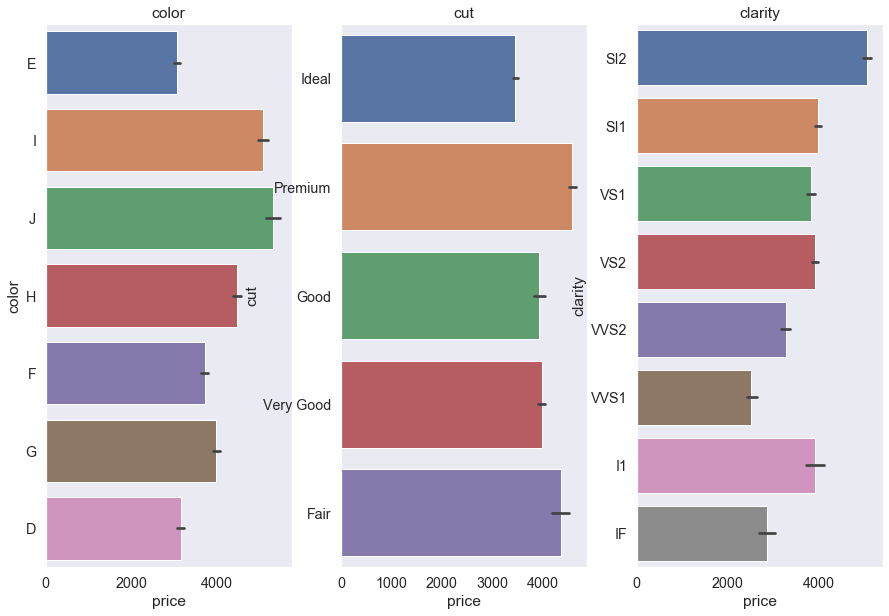

In [7]:
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.3, style='dark')

plt.subplot(1,3,1)
#sns.barplot(x=df['color'].value_counts())
sns.barplot(data=df, y='color', x='price')
plt.title('color')
 

plt.subplot(1,3,2)
sns.barplot(data=df, y='cut', x='price')
plt.title('cut')

plt.subplot(1,3,3)
sns.barplot(data=df, y='clarity', x='price')
plt.title('clarity')

This gave us insights about the frequency of each category in each of the categorical attributes

## (for numrical data):

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


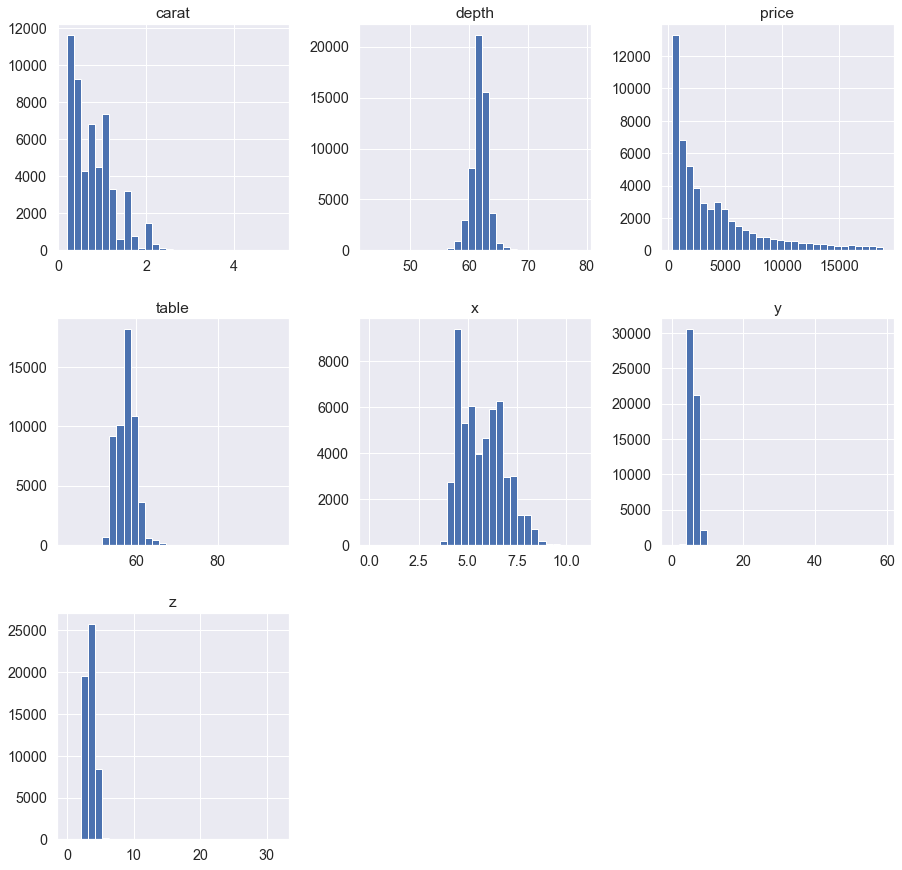

In [9]:
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3, style='dark')
df.hist(bins=30)
plt.show()

C:\Users\Nada Abbas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nada Abbas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nada Abbas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

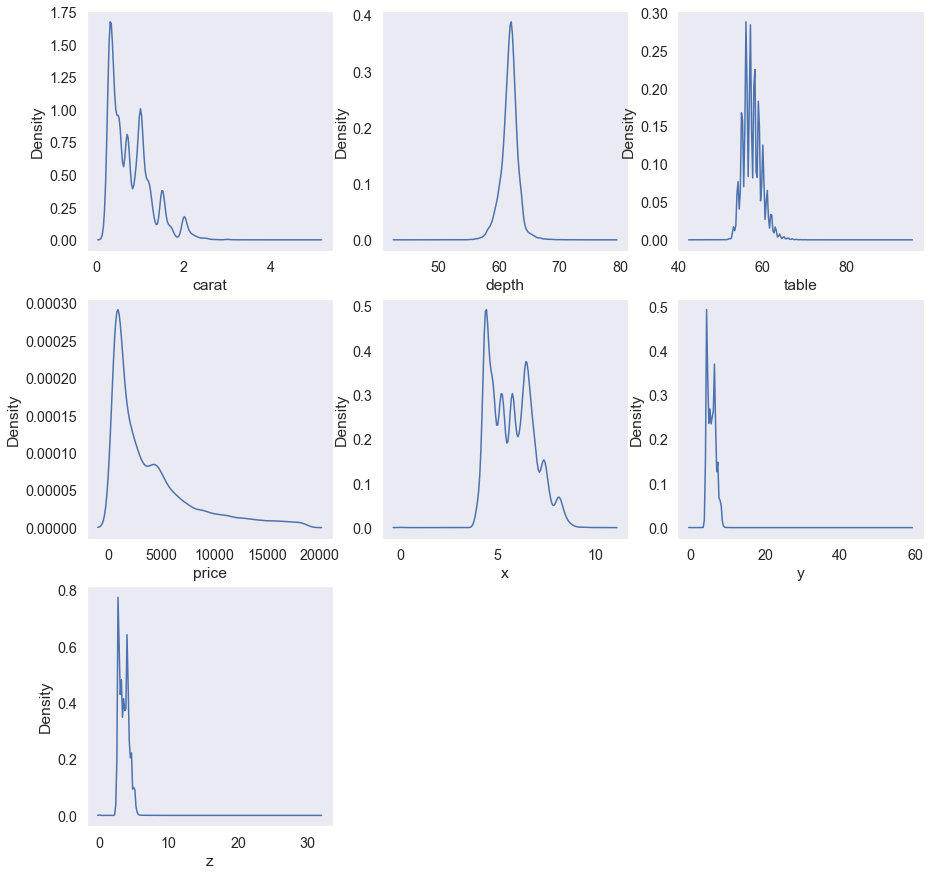

In [10]:
num_attr= ['carat','depth','table','price','x','y','z']
for i, att in zip(range(1,8),num_attr):
    plt.subplot(3,3,i)   
    sns.distplot(df[att],hist=False)

**from this we conclude:**
- **for carat:** most of diamonds range between 0 to 2 carats where the largest carat value is about 0.2
- **for depth:** this is a normal distribution mostly concentrated around nearly 62%
- **for table:** this is also considered as normal distribution except for the fact that there is variance in the values around the center
- **for the price:** it is mostly skewed left which meen that most diamons range between 0 to 500 USDs while small number is considered to be expensive (requires more investigation to know the most affecting attributes on the price)

- *according to all the histograms we can see that z, y, carat and price have all skewed left distributions (most probabiliy corolated)*

## 3) Visualize the data:
## ==================

Visualization techniques for both numerical and categorical attributes:

|  | **Numerical** | **Categorical** |
| --- | --- | --- |
| **Univariate** | distplot| countplot |
|  | Kdeplot |  |
|  |  |  |
| **MultiVariate** | jointplot | boxplot |
|  | pairplot | violinplot |
|  |  | striplot |
|  |  | swarmplot |
|  |  | barplot |

we already saw histogram of each numerical attribute so no need for distplot

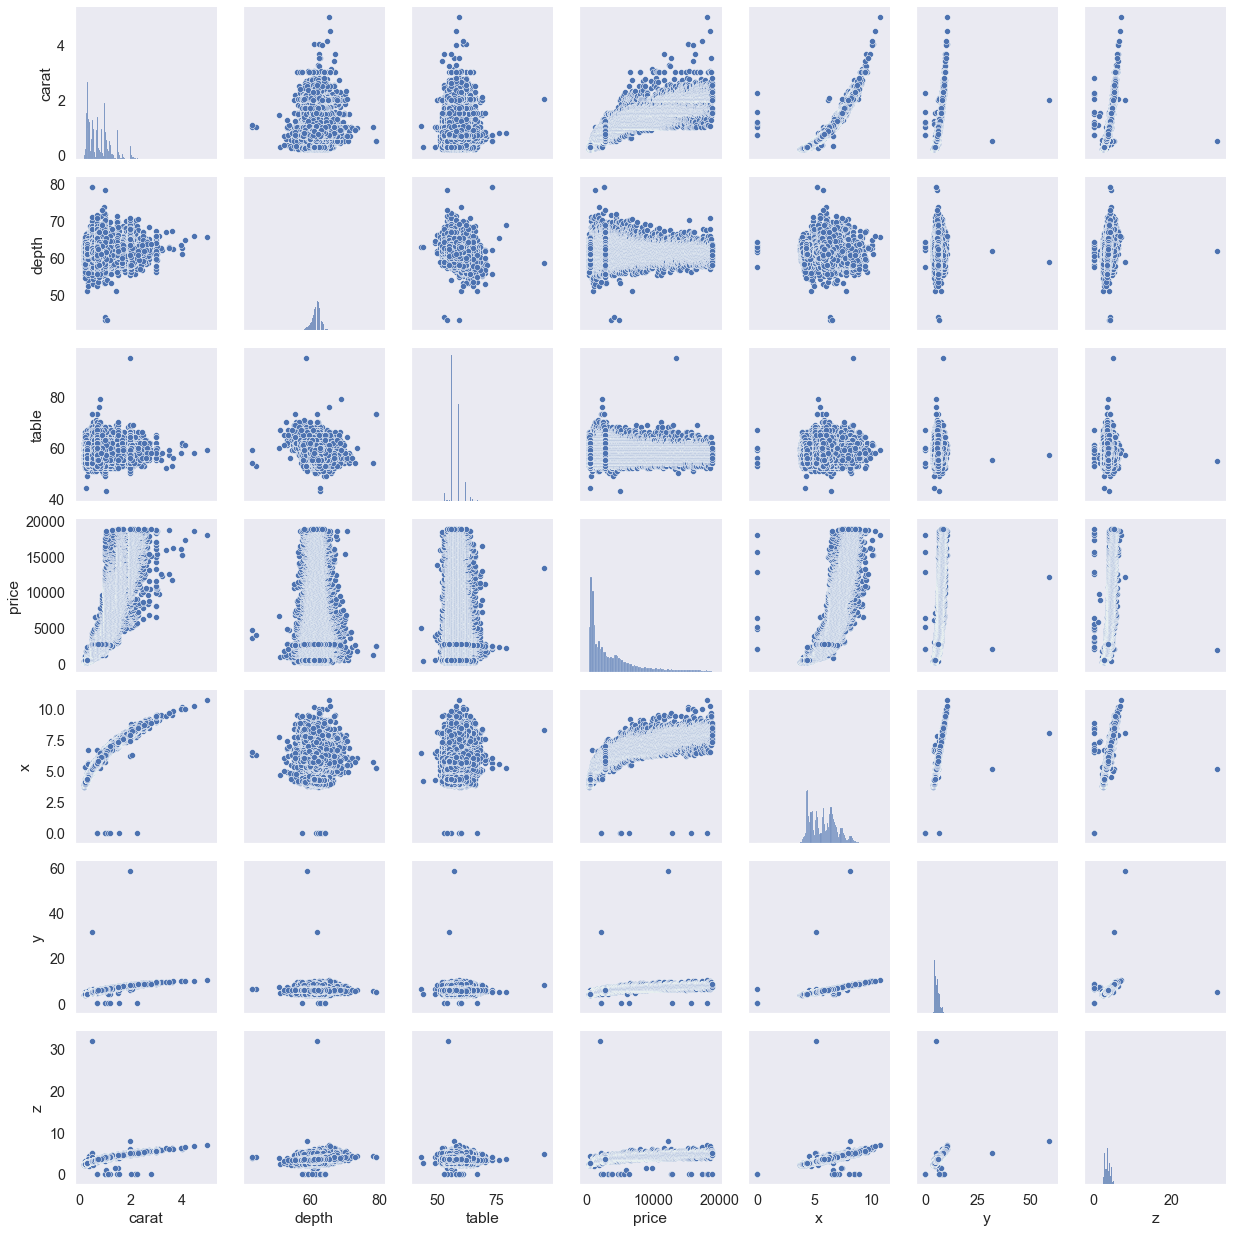

In [11]:
sns.color_palette("flare", as_cmap=True)
sns.pairplot(df)

the pair plot show the existance of outliersin the data (will use boxplot to investigate it further)

I then investigated the features related to dimensions: x,y,z, depth relative to the cut shape, color and clarity: 

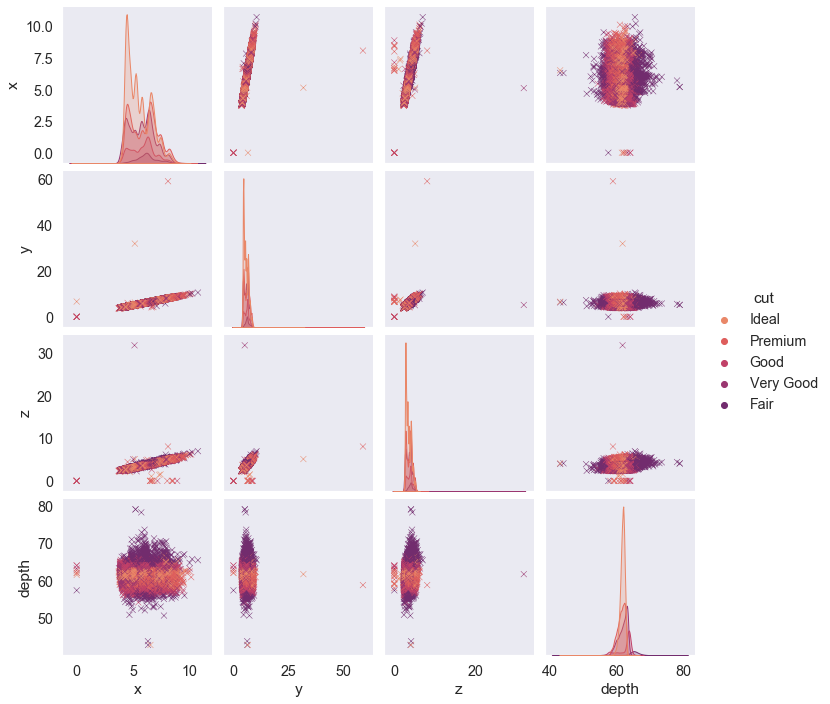

In [12]:
sns.color_palette("flare", as_cmap=True)
#sns.pairplot(df[['x','y','z','depth']], palette='flare', markers='x',hue=df['cut'])
sns.pairplot(data=df, vars=['x','y','z','depth'], palette='flare', hue='cut', markers='x')

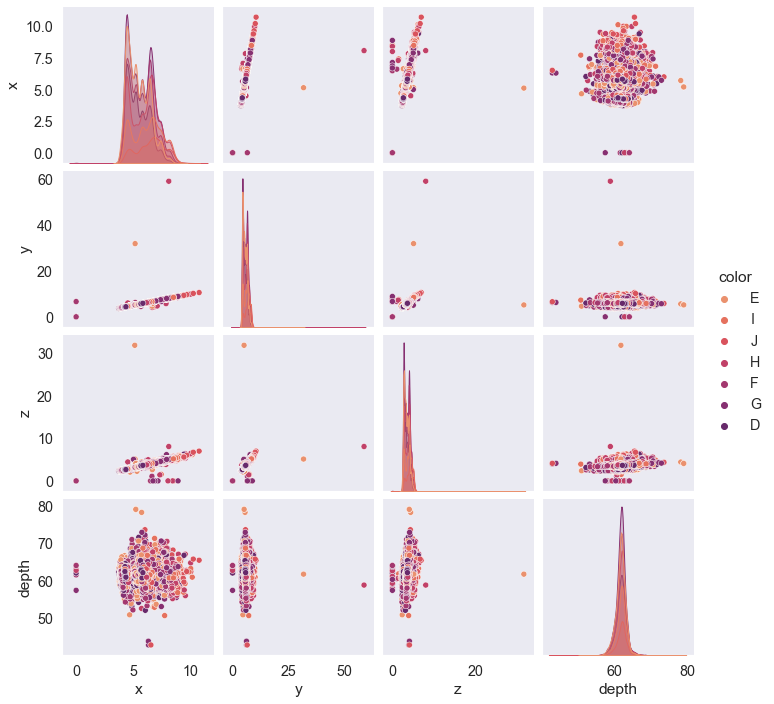

In [13]:
sns.pairplot(data=df, vars=['x','y','z','depth'], palette='flare', hue='color')#, markers='x')

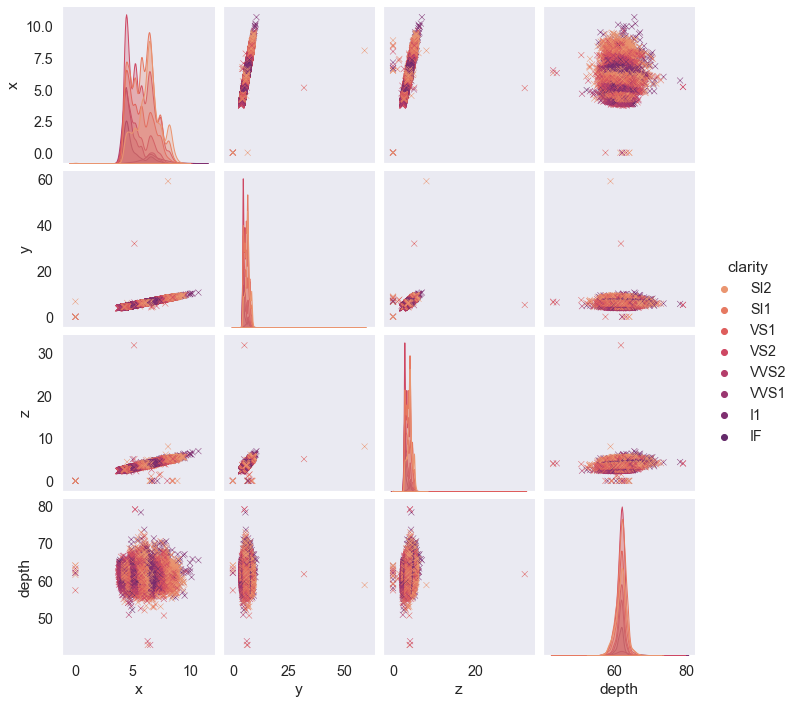

In [14]:
sns.pairplot(data=df, vars=['x','y','z','depth'], palette='flare', hue='clarity', markers='x')

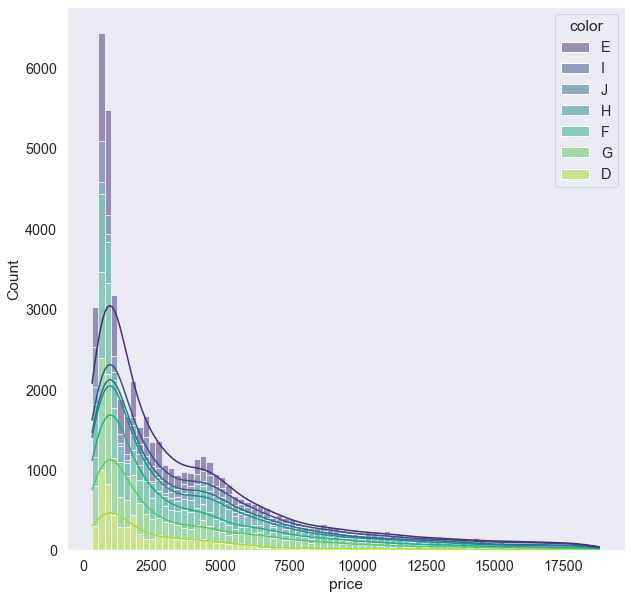

In [15]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3, style='dark')
sns.histplot(data=df,x='price', palette='viridis', kde=True ,hue='color', multiple="stack")

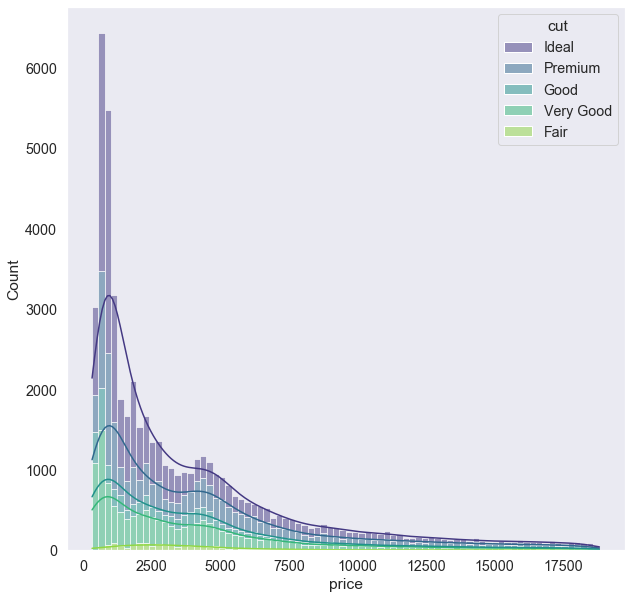

In [16]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3, style='dark')
sns.histplot(data=df,x='price', palette='viridis', kde=True ,hue='cut', multiple="stack")

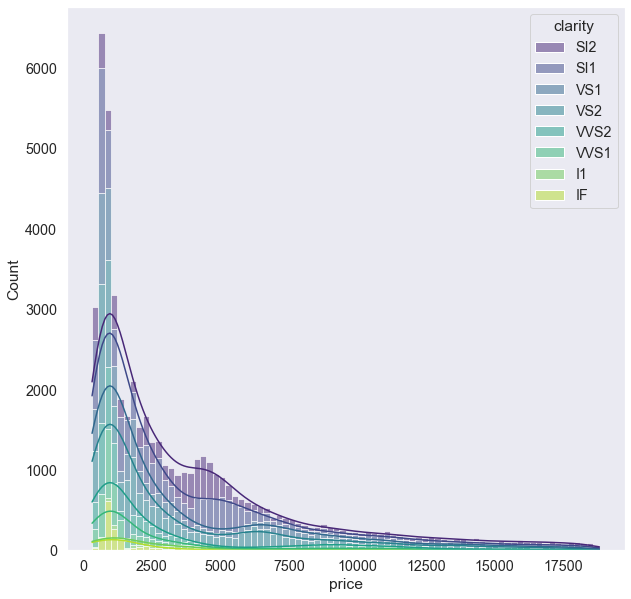

In [17]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3, style='dark')
sns.histplot(data=df,x='price', palette='viridis', kde=True ,hue='clarity', multiple="stack")

In [18]:
list(df['clarity'].value_counts().values)

[13065, 12258, 9194, 8171, 5066, 3655, 1790, 741]

In [19]:
list(df['color'].value_counts().index)

['G', 'E', 'F', 'H', 'D', 'I', 'J']

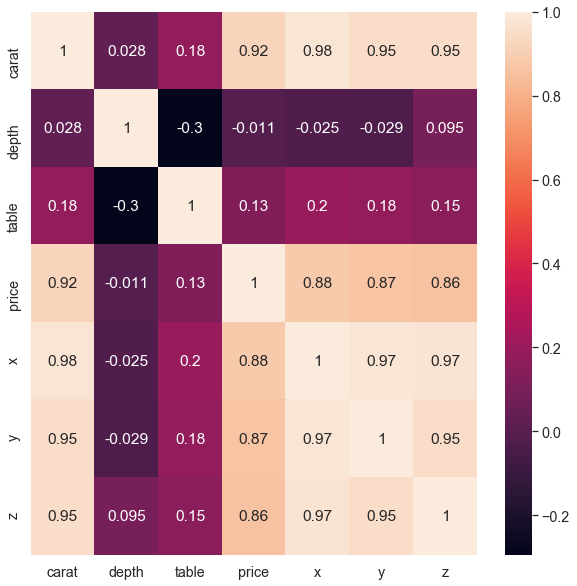

In [20]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3, style='dark')
sns.heatmap(data=df.corr(), cmap='rocket', annot=True)

most correlated attributes with price attribute are: carat, x,y,z

depth and table are not highly correlated with any of the other attributes

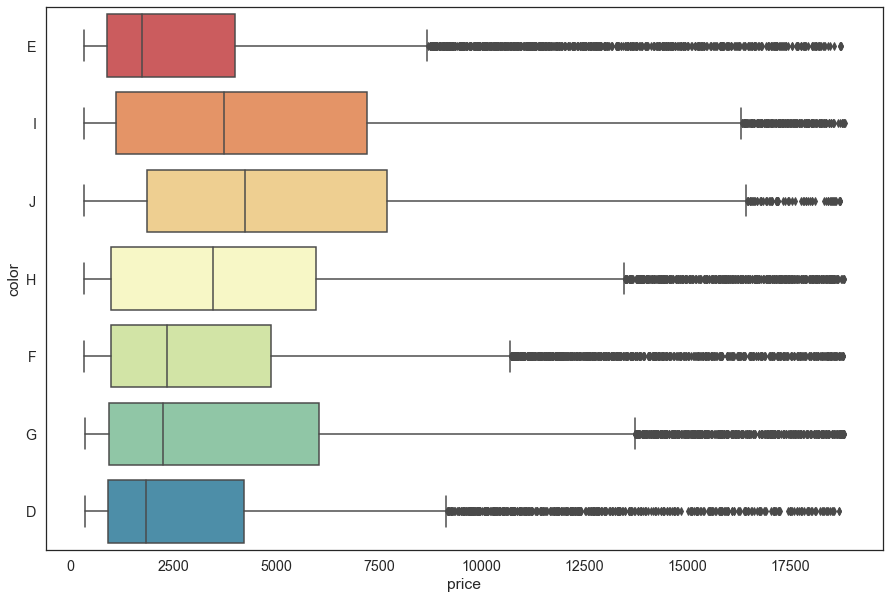

In [21]:
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.3, style='white')
sns.boxplot(data=df, x='price', y='color', palette='Spectral')

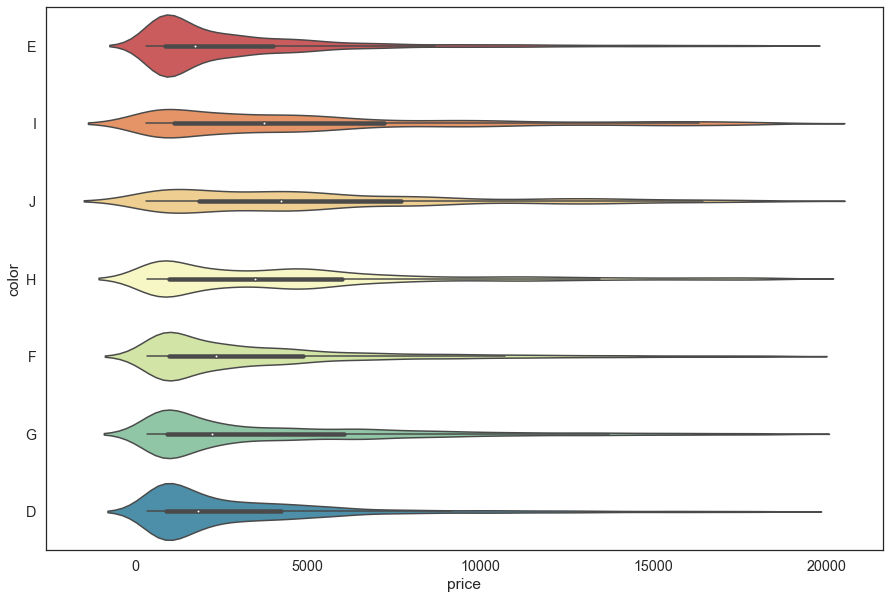

In [22]:
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.3, style='white')
sns.violinplot(data=df, x='price', y='color', palette='Spectral')

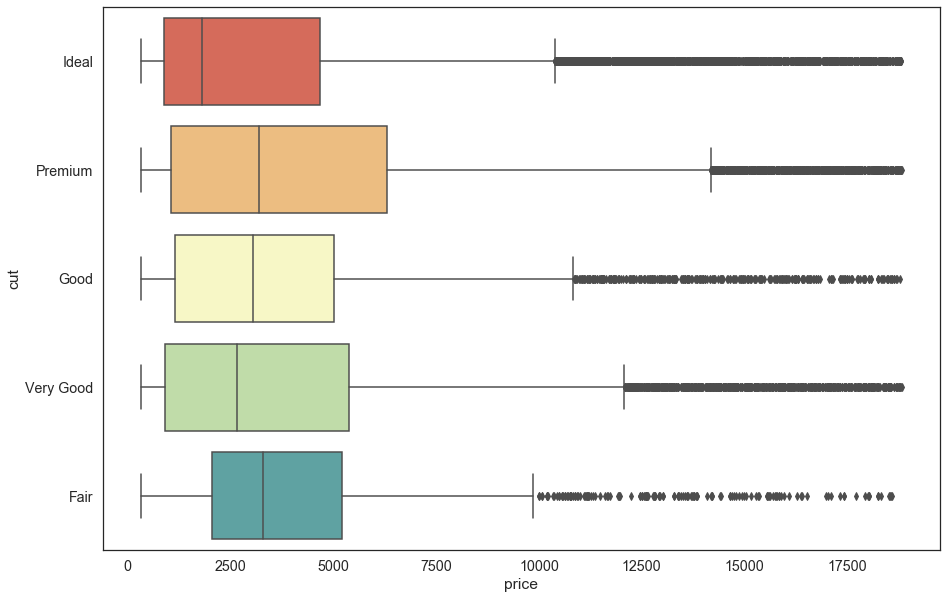

In [23]:
sns.boxplot(data=df, x='price', y='cut', palette='Spectral')

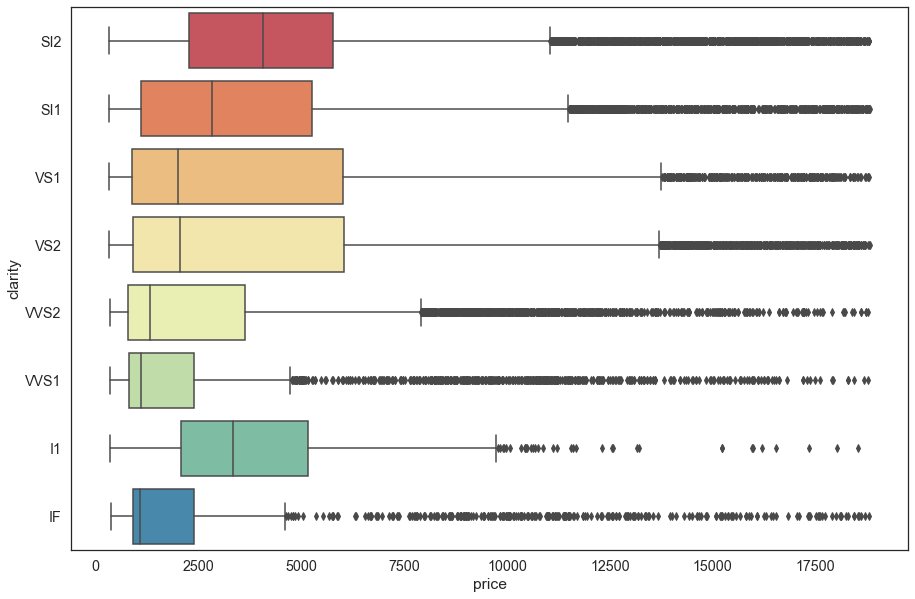

In [24]:
sns.boxplot(data=df, x='price', y='clarity', palette='Spectral')

C:\Users\Nada Abbas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nada Abbas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nada Abbas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nada Abbas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nada Abbas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWar

KeyboardInterrupt: 

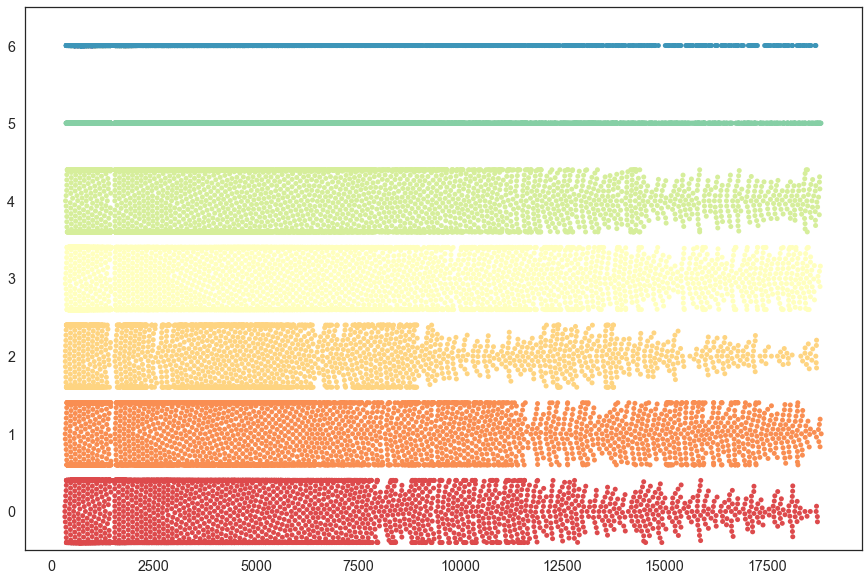

In [76]:
sns.swarmplot(data=df, x='price', y='color', palette='Spectral')

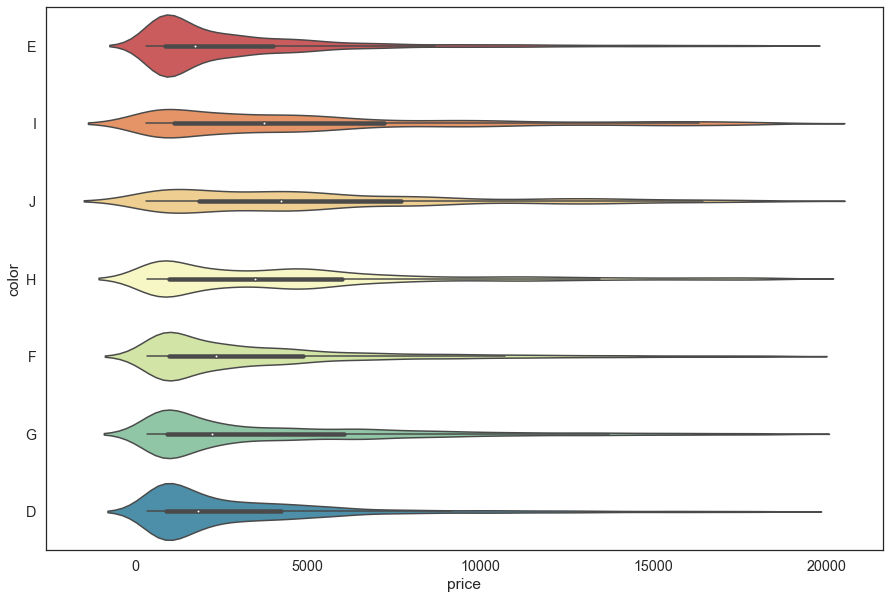

In [25]:
sns.violinplot(data=df, x='price', y='color', palette='Spectral')

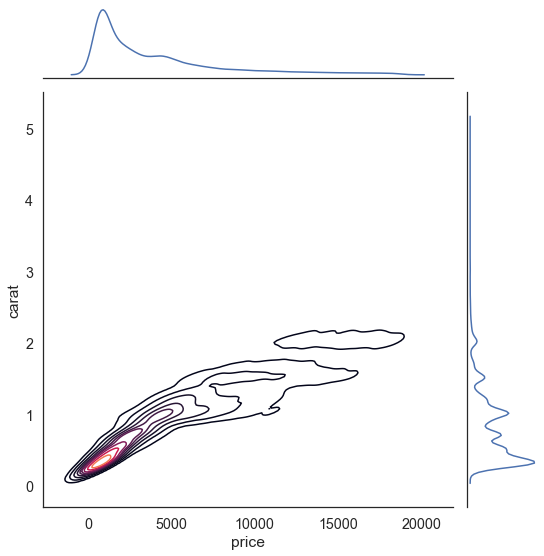

In [26]:
sns.jointplot(x='price', y='carat', data=df, height=8, kind='kde', cmap='rocket')

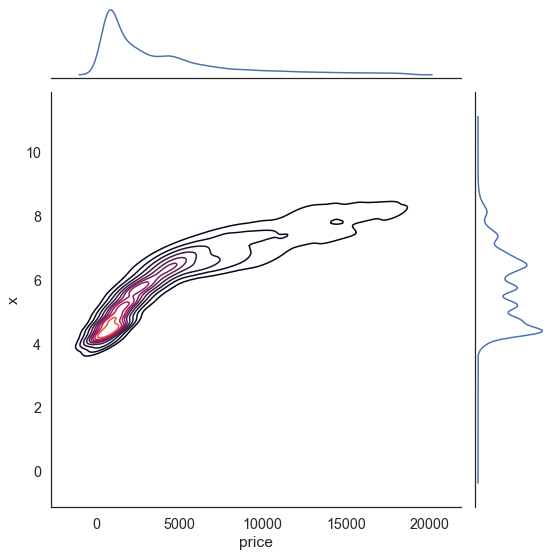

In [27]:
sns.jointplot(x='price', y='x', data=df, height=8, kind='kde', cmap='rocket')

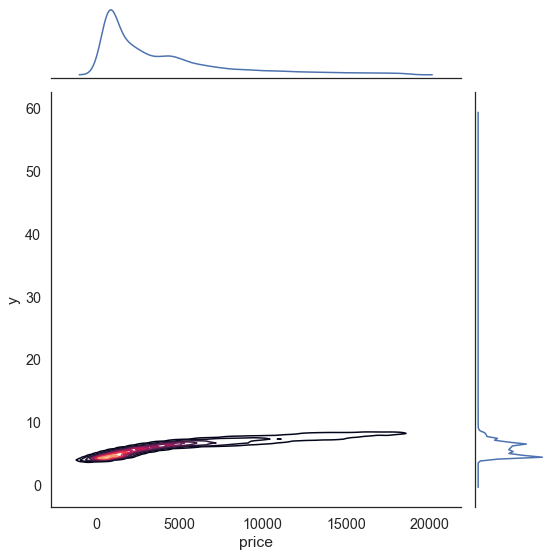

In [28]:
sns.jointplot(x='price', y='y', data=df, height=8, kind='kde', cmap='rocket')

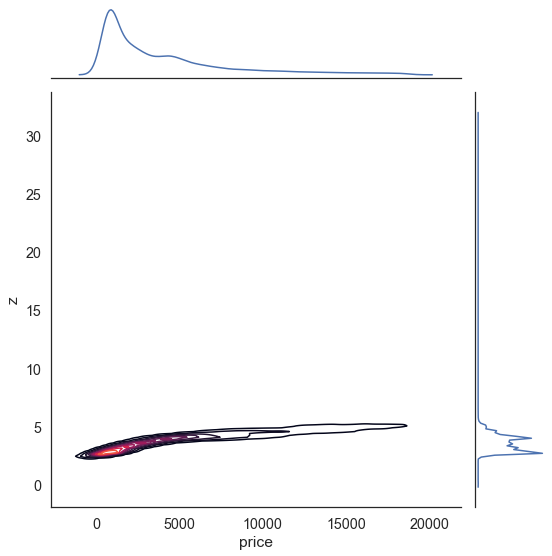

In [29]:
sns.jointplot(x='price', y='z', data=df, height=8, kind='kde', cmap='rocket')

## 4) Creating attribute combination for better visualization:

In [48]:
df['volume']=df['x']*df['y']*df['z'] # measured in mm cube
df['table_mm']= df['table']/100
df['diameter']=df['table']*df['y']/100  #df['y']*100/df['table'] 
df['depth']=df['depth']/100
df['pavilion depth']=df['z']-df['depth'] # z= height - pavilion depth in mm
df['pavilion angle']= np.tan(df['diameter']/df['pavilion depth'])  # measured in degree

- **price:** price in US dollars (\$326--\$18,823)
- **carat:** weight of the diamond (0.2--5.01)
- **cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color:** diamond colour, from J (worst) to D (best)
- **clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x:** length in mm (0--10.74)
- **y:** width in mm (0--58.9)
- **z:** depth in mm (0--31.8)
- **depth:** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- **table:** width of top of diamond relative to widest point (43--95)

In [49]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,diameter,pavilion depth,pavilion angle,table_mm
1,0.23,Ideal,E,SI2,0.000062,55.0,326,3.95,3.98,2.43,38.202030,2.1890,2.429939,1.262350,0.55
2,0.21,Premium,E,SI1,0.000060,61.0,326,3.89,3.84,2.31,34.505856,2.3424,2.309940,1.606624,0.61
3,0.23,Good,E,VS1,0.000057,65.0,327,4.05,4.07,2.31,38.076885,2.6455,2.309943,2.206425,0.65
4,0.29,Premium,I,VS2,0.000062,58.0,334,4.20,4.23,2.63,46.724580,2.4534,2.629938,1.348946,0.58
5,0.31,Good,J,SI2,0.000063,58.0,335,4.34,4.35,2.75,51.917250,2.5230,2.749937,1.306408,0.58


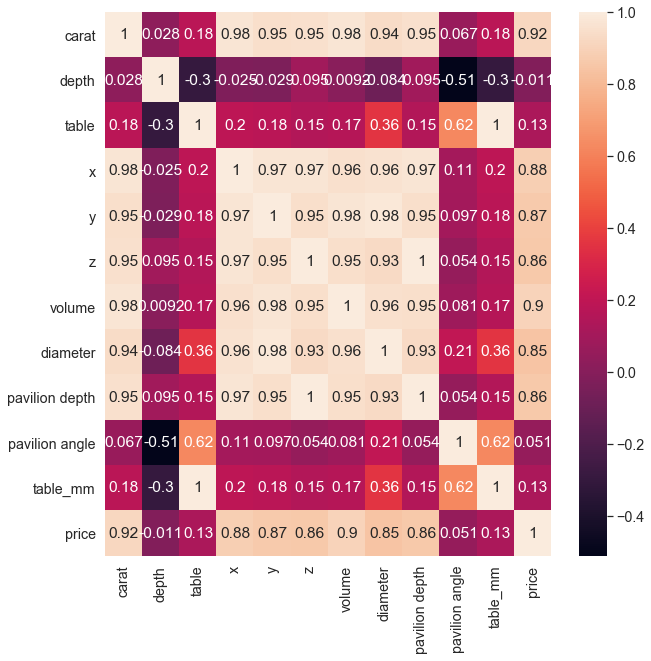

In [52]:
df = df[['carat','cut','color','clarity','depth','table','x','y','z','volume','diameter','pavilion depth','pavilion angle','table_mm','price']]
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3, style='dark')
sns.heatmap(data=df.corr(), cmap='rocket', annot=True)

 **from this we conclude that:**
 - highly correlated attributes with price are: carat, x, y, z, volume, diameter, pivilion depth
 - attributes of less correlation: table, table_mm, depth, pavilion angle

# Step 3: Data preparation for ML algorithm:
# ------------------------------------------------------------

## 1) Data Cleaning:
## ===============
**it includes multiple steps:**
- **Getting rid of corresponding districts:** for Nan values - we have no nan values in this dataset - could also be used for outliers (not taken yet)
- **Getting rid of whole attribute:** in case of large numebr of nan values or bad effect (low correlation with the price attribute)
- **set unknown values (nan) to another value:** - not used here

### a) Get rid of whole attribute:
### = = = = = = = = = = = = = = = = 

In [53]:
df.drop(['table_mm', 'depth', 'pavilion angle'], axis=1, inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carat           53940 non-null  float64
 1   cut             53940 non-null  object 
 2   color           53940 non-null  object 
 3   clarity         53940 non-null  object 
 4   table           53940 non-null  float64
 5   x               53940 non-null  float64
 6   y               53940 non-null  float64
 7   z               53940 non-null  float64
 8   volume          53940 non-null  float64
 9   diameter        53940 non-null  float64
 10  pavilion depth  53940 non-null  float64
 11  price           53940 non-null  int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 5.3+ MB


## 2) Handeling text and categorical data:

In [55]:
from sklearn.preprocessing import OneHotEncoder
df_cat_1 = df[['color']]
df_cat_2 = df[['cut']]
df_cat_3 = df[['clarity']]
cat_encoder = OneHotEncoder()
df2_1hot = cat_encoder.fit_transform(df_cat_1)
df2_2hot = cat_encoder.fit_transform(df_cat_2)
df2_3hot = cat_encoder.fit_transform(df_cat_3)

In [56]:
df_encoded_1 = pd.DataFrame(df2_1hot.toarray(), columns='color_'+df["color"].unique())
df_encoded_2 = pd.DataFrame(df2_2hot.toarray(), columns='cut_'+df["cut"].unique())
df_encoded_3 = pd.DataFrame(df2_3hot.toarray(), columns='clarity_'+df["clarity"].unique())
df_encoded = pd.concat([df, df_encoded_1, df_encoded_2, df_encoded_3], axis=1)
df_encoded.drop(['color','cut','clarity'], axis=1, inplace=True)

In [67]:
df_encoded.drop([0,53940])

,carat,table,x,y,z,volume,diameter,pavilion depth,price,color_E,...,cut_Very Good,cut_Fair,clarity_SI2,clarity_SI1,clarity_VS1,clarity_VS2,clarity_VVS2,clarity_VVS1,clarity_I1,clarity_IF
1,0.23,55.0,3.95,3.98,2.43,38.202030,2.1890,2.429939,326.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.21,61.0,3.89,3.84,2.31,34.505856,2.3424,2.309940,326.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.23,65.0,4.05,4.07,2.31,38.076885,2.6455,2.309943,327.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.29,58.0,4.20,4.23,2.63,46.724580,2.4534,2.629938,334.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.31,58.0,4.34,4.35,2.75,51.917250,2.5230,2.749937,335.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,59.0,5.69,5.73,3.58,116.721246,3.3807,3.579937,2757.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,57.0,5.75,5.76,3.50,115.920000,3.2832,3.499939,2757.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.72,55.0,5.69,5.75,3.61,118.110175,3.1625,3.609937,2757.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.70,60.0,5.66,5.68,3.56,114.449728,3.4080,3.559937,2757.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [64]:
df2=df
df_2 = pd.get_dummies(df2)

In [65]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carat           53940 non-null  float64
 1   table           53940 non-null  float64
 2   x               53940 non-null  float64
 3   y               53940 non-null  float64
 4   z               53940 non-null  float64
 5   volume          53940 non-null  float64
 6   diameter        53940 non-null  float64
 7   pavilion depth  53940 non-null  float64
 8   price           53940 non-null  int64  
 9   cut_Fair        53940 non-null  uint8  
 10  cut_Good        53940 non-null  uint8  
 11  cut_Ideal       53940 non-null  uint8  
 12  cut_Premium     53940 non-null  uint8  
 13  cut_Very Good   53940 non-null  uint8  
 14  color_D         53940 non-null  uint8  
 15  color_E         53940 non-null  uint8  
 16  color_F         53940 non-null  uint8  
 17  color_G         53940 non-null 

In [66]:
df_2.head()

,carat,table,x,y,z,volume,diameter,pavilion depth,price,cut_Fair,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,55.0,3.95,3.98,2.43,38.202030,2.1890,2.429939,326,0,...,0,0,0,0,0,1,0,0,0,0
2,0.21,61.0,3.89,3.84,2.31,34.505856,2.3424,2.309940,326,0,...,0,0,0,0,1,0,0,0,0,0
3,0.23,65.0,4.05,4.07,2.31,38.076885,2.6455,2.309943,327,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,58.0,4.20,4.23,2.63,46.724580,2.4534,2.629938,334,0,...,1,0,0,0,0,0,0,1,0,0
5,0.31,58.0,4.34,4.35,2.75,51.917250,2.5230,2.749937,335,0,...,0,1,0,0,0,1,0,0,0,0


## 3) Feature Scaling:

- **price:** price in US dollars (\$326--\$18,823)
- **carat:** weight of the diamond (0.2--5.01)
- **cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color:** diamond colour, from J (worst) to D (best)
- **clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x:** length in mm (0--10.74)
- **y:** width in mm (0--58.9)
- **z:** depth in mm (0--31.8)

- **table:** width of top of diamond relative to widest point (43--95)
- **volume:** volume of diamond= x*y*z measured in mm cube (0--3840)
- **diameter:** diameter of table since table is in percentage = table*y/100 = mm (0--33.5)
- **pavilion depth:** depth of the rest of the diamond - the crown depth = z-depth - mm (0--31.7)

### feartures that require scaling are: volume

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(df_2)

In [97]:
df_scaled_1 = pd.DataFrame(data, columns=[df_2.columns])
df_scaled_1.head(10)

,carat,table,x,y,z,volume,diameter,pavilion depth,price,cut_Fair,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.230769,0.367784,0.067572,0.076415,0.009947,0.065201,0.076415,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.002079,0.346154,0.362197,0.065195,0.072642,0.008985,0.069770,0.072642,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.006237,0.423077,0.377095,0.069100,0.072642,0.009914,0.078798,0.072642,0.000054,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.018711,0.288462,0.391061,0.071817,0.082704,0.012166,0.073077,0.082704,0.000433,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.022869,0.288462,0.404097,0.073854,0.086478,0.013518,0.075150,0.086478,0.000487,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.008316,0.269231,0.366853,0.067233,0.077987,0.010075,0.067233,0.077987,0.000541,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.008316,0.269231,0.367784,0.067572,0.077673,0.010111,0.067572,0.077673,0.000541,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.012474,0.230769,0.378957,0.069779,0.079560,0.011019,0.067331,0.079560,0.000595,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.004158,0.346154,0.360335,0.064177,0.078302,0.009484,0.068680,0.078302,0.000595,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.006237,0.346154,0.372439,0.068761,0.075157,0.010081,0.073586,0.075157,0.000649,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [99]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
data = scaler2.fit_transform(df_2)
df_scaled_2 = pd.DataFrame(data, columns=[df_2.columns])
df_scaled_2.head()

,carat,table,x,y,z,volume,diameter,pavilion depth,price,cut_Fair,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198168,-1.099672,-1.587837,-1.536196,-1.571129,-1.171294,-1.602793,-1.571129,-0.904095,-0.175403,...,-0.334294,-0.234343,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954
1,-1.240361,1.585529,-1.641325,-1.658774,-1.741175,-1.218533,-1.381407,-1.741173,-0.904095,-0.175403,...,-0.334294,-0.234343,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
2,-1.198168,3.375663,-1.498691,-1.457395,-1.741175,-1.172894,-0.943975,-1.741168,-0.903844,-0.175403,...,-0.334294,-0.234343,-0.11802,-0.185268,-0.565361,-0.453289,2.366727,-0.542295,-0.269603,-0.321954
3,-1.071587,0.242928,-1.364971,-1.317305,-1.287720,-1.062372,-1.221212,-1.287721,-0.902090,-0.175403,...,2.991381,-0.234343,-0.11802,-0.185268,-0.565361,-0.453289,-0.422524,1.844015,-0.269603,-0.321954
4,-1.029394,0.242928,-1.240167,-1.212238,-1.117674,-0.996008,-1.120766,-1.117676,-0.901839,-0.175403,...,-0.334294,4.267248,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954


انا محبتش التاني عشان حوله كله للسالب رغم ان الطريقة التانية احسن للاوت لايرز